Ref: https://github.com/heitorrapela/fashion-mnist-mlp/blob/master/fashion_mnist_mlp.py


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout

Using TensorFlow backend.


In [0]:
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train_all.shape, y_train_all.shape

((60000, 28, 28), (60000,))

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, test_size=10000, random_state=42)

In [6]:
x_train.shape, x_valid.shape

((50000, 28, 28), (10000, 28, 28))

In [0]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

In [8]:
y_train[0:10]

array([5, 0, 0, 1, 4, 5, 6, 8, 6, 9], dtype=uint8)

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu', kernel_initializer='normal', input_shape=(28*28,)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

optim = keras.optimizers.Adam(lr=1e-3, decay=3e-06)
# optim = keras.optimizers.SGD(lr=1e-3, momentum=0.85, decay=2e-06, nesterov=True)

model.compile(loss='categorical_crossentropy',
			  optimizer=optim,
			  metrics=['accuracy'])

print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      

In [11]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=2, mode='auto', baseline=None)
save_best = keras.callbacks.ModelCheckpoint(f"fashion_min_valLoss.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history = model.fit(x_train, y_train,
					batch_size=128,
					epochs=50,
					verbose=2,
					validation_data=(x_valid, y_valid),
                    callbacks=[save_best],
                    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





 - 3s - loss: 0.8719 - acc: 0.6781 - val_loss: 0.4902 - val_acc: 0.8213
Epoch 2/50
 - 2s - loss: 0.5323 - acc: 0.8143 - val_loss: 0.4226 - val_acc: 0.8440
Epoch 3/50
 - 2s - loss: 0.4669 - acc: 0.8378 - val_loss: 0.4001 - val_acc: 0.8513
Epoch 4/50
 - 2s - loss: 0.4385 - acc: 0.8473 - val_loss: 0.3798 - val_acc: 0.8631
Epoch 5/50
 - 2s - loss: 0.4192 - acc: 0.8532 - val_loss: 0.3676 - val_acc: 0.8643
Epoch 6/50
 - 2s - loss: 0.4023 - acc: 0.8586 - val_loss: 0.3576 - val_acc: 0.8647
Epoch 7/50
 - 2s - loss: 0.3920 - acc: 0.8636 - val_loss: 0.3419 - val_acc: 0.8741
Epoch 8/50
 - 2s - loss: 0.3770 - acc: 0.8664 - val_loss: 0.3465 - val_acc: 0.8721
Epoch 9/50
 - 2s - loss: 0.3719 - acc: 0.8692 - val_loss: 0.3340 - val_acc: 0.8774
Epoch 10/50
 - 2s - loss: 0.3595 - acc: 0.8722 - val_loss: 0.3320 - val_acc: 0.8768
Epoch 11/50
 - 2s

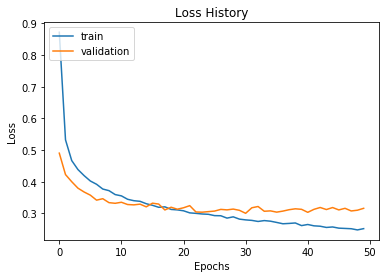

In [12]:
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss History')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig("loss_history.png", bbox_inches='tight')
plt.show()

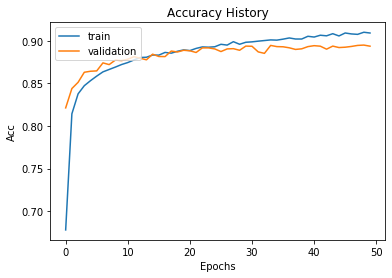

In [13]:
# summarize history for acc
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy History')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig("acc_history.png", bbox_inches='tight')
plt.show()

In [0]:
model.load_weights('fashion_min_valLoss.h5')

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Testing accuracy score:', score[1])

Test loss: 0.3251228447079659
Testing accuracy score: 0.887
